In [71]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from ipywidgets import interact
from ml_collections import ConfigDict
from models.ETD_KT_CM_JAX_Vectorised import *
from filters import resamplers
from filters.filter import ParticleFilter
jax.config.update("jax_platform_name", "cpu")
import metrics.ensemble as ens_metrics
from jax.config import config
config.update("jax_enable_x64", True)

In this experiment we perform a increase in particle members, to assess how this effects forecast skill scores in an idealised testing environment. 

In [72]:
signal_params = ConfigDict(KDV_params_2)
print(signal_params)

Advection_basis_name: none
E: 1
Forcing_basis_name: none
P: 1
S: 0
c_0: 0
c_1: 1
c_2: 0.0
c_3: 2.0e-05
c_4: 0.0
dt: 0.001
equation_name: KdV
initial_condition: gaussian
method: Dealiased_SETDRK4
noise_magnitude: 0.0
nx: 256
tmax: 1
xmax: 1
xmin: 0



In [73]:
ensemble_params_1 = ConfigDict(KDV_params_2_SALT)
ensemble_params_2 = ConfigDict(KDV_params_2_SALT)
ensemble_params_3 = ConfigDict(KDV_params_2_SALT)
ensemble_params_4 = ConfigDict(KDV_params_2_SALT)
ensemble_params_5 = ConfigDict(KDV_params_2_SALT)
ensemble_params_6 = ConfigDict(KDV_params_2_SALT)
ensemble_params_7 = ConfigDict(KDV_params_2_SALT)
ensemble_params_8 = ConfigDict(KDV_params_2_SALT)


Next, we specify a signal, by choosing a deterministic solver, 

In [74]:
nx_new = 32
signal_params.update(E=1,method='Dealiased_ETDRK4',P=1,S=0,tmax=4,nmax=256*4,nx=nx_new)
ensemble_params_1.update(E=16,noise_magnitude=0.001,P=32,tmax=4,nmax=256*4,nx=nx_new)
ensemble_params_2.update(E=32,noise_magnitude=0.001,P=32,tmax=4,nmax=256*4,nx=nx_new)
ensemble_params_3.update(E=64,noise_magnitude=0.001,P=32,tmax=4,nmax=256*4,nx=nx_new)
ensemble_params_4.update(E=128,noise_magnitude=0.001,P=32,tmax=4,nmax=256*4,nx=nx_new)
ensemble_params_5.update(E=256,noise_magnitude=0.001,P=32,tmax=4,nmax=256*4,nx=nx_new)
ensemble_params_6.update(E=512,noise_magnitude=0.001,P=32,tmax=4,nmax=256*4,nx=nx_new)
ensemble_params_7.update(E=1024,noise_magnitude=0.001,P=32,tmax=4,nmax=256*4,nx=nx_new)
ensemble_params_8.update(E=2048,noise_magnitude=0.001,P=32,tmax=4,nmax=256*4,nx=nx_new)

Now we continue to define a stochastic ensemble

Now we specify the models, by calling the class.

In [75]:
signal_model_1 = ETD_KT_CM_JAX_Vectorised(signal_params)
signal_model_2 = ETD_KT_CM_JAX_Vectorised(signal_params)
signal_model_3 = ETD_KT_CM_JAX_Vectorised(signal_params)
signal_model_4 = ETD_KT_CM_JAX_Vectorised(signal_params)
signal_model_5 = ETD_KT_CM_JAX_Vectorised(signal_params)
signal_model_6 = ETD_KT_CM_JAX_Vectorised(signal_params)
signal_model_7 = ETD_KT_CM_JAX_Vectorised(signal_params)
signal_model_8 = ETD_KT_CM_JAX_Vectorised(signal_params)

In [76]:
ensemble_model_1 = ETD_KT_CM_JAX_Vectorised(ensemble_params_1)
ensemble_model_2 = ETD_KT_CM_JAX_Vectorised(ensemble_params_2)
ensemble_model_3 = ETD_KT_CM_JAX_Vectorised(ensemble_params_3)
ensemble_model_4 = ETD_KT_CM_JAX_Vectorised(ensemble_params_4)
ensemble_model_5 = ETD_KT_CM_JAX_Vectorised(ensemble_params_5)
ensemble_model_6 = ETD_KT_CM_JAX_Vectorised(ensemble_params_6)
ensemble_model_7 = ETD_KT_CM_JAX_Vectorised(ensemble_params_7)
ensemble_model_8 = ETD_KT_CM_JAX_Vectorised(ensemble_params_8)

In [77]:

initial_signal = initial_condition(signal_model_1.x, signal_params.E, signal_params.initial_condition)
initial_ensemble_1 = initial_condition(ensemble_model_1.x, ensemble_params_1.E, ensemble_params_1.initial_condition)
initial_ensemble_2 = initial_condition(ensemble_model_2.x, ensemble_params_2.E, ensemble_params_2.initial_condition)
initial_ensemble_3 = initial_condition(ensemble_model_3.x, ensemble_params_3.E, ensemble_params_3.initial_condition)
initial_ensemble_4 = initial_condition(ensemble_model_4.x, ensemble_params_4.E, ensemble_params_4.initial_condition)
initial_ensemble_5 = initial_condition(ensemble_model_5.x, ensemble_params_5.E, ensemble_params_5.initial_condition)
initial_ensemble_6 = initial_condition(ensemble_model_6.x, ensemble_params_6.E, ensemble_params_6.initial_condition)
initial_ensemble_7 = initial_condition(ensemble_model_7.x, ensemble_params_7.E, ensemble_params_7.initial_condition)
initial_ensemble_8 = initial_condition(ensemble_model_8.x, ensemble_params_8.E, ensemble_params_8.initial_condition)

available_resamplers = ", ".join(resamplers.keys())
print(available_resamplers)

multinomial, systematic, no_resampling, default


In [78]:
obs_frequency = 32
observation_noise = 1e-3
observation_locations_params = jnp.arange(0,len(signal_model_1.x),obs_frequency)
#observation_locations_params = None
pf_1 = ParticleFilter(n_particles = ensemble_params_1.E,
                      n_steps = 1,
                      n_dim = initial_signal.shape[-1],
                      forward_model = ensemble_model_1,
                      signal_model = signal_model_1,
                      sigma = observation_noise,# this seems to be different than the sigma for the xi.
                      seed = 11,
                      resampling='multinomial',
                      observation_locations = observation_locations_params,)
pf_2 = ParticleFilter(n_particles = ensemble_params_2.E,
                        n_steps = 1,
                        n_dim = initial_signal.shape[-1],
                        forward_model = ensemble_model_2,
                        signal_model = signal_model_2,
                        sigma = observation_noise,# this seems to be different than the sigma for the xi.
                        seed = 11,
                        resampling='multinomial',
                        observation_locations = observation_locations_params,)
pf_3 = ParticleFilter(n_particles = ensemble_params_3.E,
                        n_steps = 1,
                        n_dim = initial_signal.shape[-1],
                        forward_model = ensemble_model_3,
                        signal_model = signal_model_3,
                        sigma = observation_noise,# this seems to be different than the sigma for the xi.
                        seed = 11,
                        resampling='multinomial',
                        observation_locations = observation_locations_params,)
pf_4 = ParticleFilter(n_particles = ensemble_params_4.E,
                        n_steps = 1,
                        n_dim = initial_signal.shape[-1],
                        forward_model = ensemble_model_4,
                        signal_model = signal_model_4,
                        sigma = observation_noise,# this seems to be different than the sigma for the xi.
                        seed = 11,
                        resampling='multinomial',
                        observation_locations = observation_locations_params,)
pf_5 = ParticleFilter(n_particles = ensemble_params_5.E,
                        n_steps = 1,
                        n_dim = initial_signal.shape[-1],
                        forward_model = ensemble_model_5,
                        signal_model = signal_model_5,
                        sigma = observation_noise,# this seems to be different than the sigma for the xi.
                        seed = 11,
                        resampling='multinomial',
                        observation_locations = observation_locations_params,)
pf_6 = ParticleFilter(n_particles = ensemble_params_6.E,
                        n_steps = 1,
                        n_dim = initial_signal.shape[-1],
                        forward_model = ensemble_model_6,
                        signal_model = signal_model_6,
                        sigma = observation_noise,# this seems to be different than the sigma for the xi.
                        seed = 11,
                        resampling='multinomial',
                        observation_locations = observation_locations_params,)
pf_7 = ParticleFilter(n_particles = ensemble_params_7.E,
                        n_steps = 1,
                        n_dim = initial_signal.shape[-1],
                        forward_model = ensemble_model_7,
                        signal_model = signal_model_7,
                        sigma = observation_noise,# this seems to be different than the sigma for the xi.
                        seed = 11,
                        resampling='multinomial',
                        observation_locations = observation_locations_params,)
pf_8 = ParticleFilter(n_particles = ensemble_params_8.E,
                        n_steps = 1,
                        n_dim = initial_signal.shape[-1],
                        forward_model = ensemble_model_8,
                        signal_model = signal_model_8,
                        sigma = observation_noise,# this seems to be different than the sigma for the xi.
                        seed = 11,
                        resampling='multinomial',
                        observation_locations = observation_locations_params,)

In [79]:
final_1, all_1 = pf_1.run(initial_ensemble_1, initial_signal, signal_model_1.nmax) 
final_2, all_2 = pf_2.run(initial_ensemble_2, initial_signal, signal_model_2.nmax)
final_3, all_3 = pf_3.run(initial_ensemble_3, initial_signal, signal_model_3.nmax)
final_4, all_4 = pf_4.run(initial_ensemble_4, initial_signal, signal_model_4.nmax)
final_5, all_5 = pf_5.run(initial_ensemble_5, initial_signal, signal_model_5.nmax)
final_6, all_6 = pf_6.run(initial_ensemble_6, initial_signal, signal_model_6.nmax)
final_7, all_7 = pf_7.run(initial_ensemble_7, initial_signal, signal_model_7.nmax)
final_8, all_8 = pf_8.run(initial_ensemble_8, initial_signal, signal_model_8.nmax)

Put in the initial condition.

In [80]:
particles_1 = jnp.concatenate([initial_ensemble_1[None,...], all_1[0]], axis=0)
particles_2 = jnp.concatenate([initial_ensemble_2[None,...], all_2[0]], axis=0)
particles_3 = jnp.concatenate([initial_ensemble_3[None,...], all_3[0]], axis=0)
particles_4 = jnp.concatenate([initial_ensemble_4[None,...], all_4[0]], axis=0)
particles_5 = jnp.concatenate([initial_ensemble_5[None,...], all_5[0]], axis=0)
particles_6 = jnp.concatenate([initial_ensemble_6[None,...], all_6[0]], axis=0)
particles_7 = jnp.concatenate([initial_ensemble_7[None,...], all_7[0]], axis=0)
particles_8 = jnp.concatenate([initial_ensemble_8[None,...], all_8[0]], axis=0)

In [81]:
signal = jnp.concatenate([initial_signal[None,...],all_1[1]], axis=0)

In [82]:
def plot(da_step):
    plt.plot(signal_model_1.x, signal[da_step,0,:], color='k',label='signal')
    plt.plot(signal_model_1.x, particles_1[da_step,0,:], color='b',label='E=16')
    plt.plot(signal_model_1.x, particles_8[da_step,0,:], color='g',label='E=2048')

    
    # plt.scatter(signal_model_1.x[::obs_frequency], observations[da_step,0,::obs_frequency], color='r',label='observations')
    plt.legend()
    plt.show()

interact(plot, da_step=(0, signal_model_1.nmax))

interactive(children=(IntSlider(value=2000, description='da_step', max=4000), Output()), _dom_classes=('widget…

<function __main__.plot(da_step)>

In [83]:
crps_1 = ens_metrics.crps(signal[1:,...], particles_1[1:,...])
crps_2 = ens_metrics.crps(signal[1:,...], particles_2[1:,...])
crps_3 = ens_metrics.crps(signal[1:,...], particles_3[1:,...])
crps_4 = ens_metrics.crps(signal[1:,...], particles_4[1:,...])
crps_5 = ens_metrics.crps(signal[1:,...], particles_5[1:,...])
crps_6 = ens_metrics.crps(signal[1:,...], particles_6[1:,...])
crps_7 = ens_metrics.crps(signal[1:,...], particles_7[1:,...])
crps_8 = ens_metrics.crps(signal[1:,...], particles_8[1:,...])

In [84]:
rmse_1 = ens_metrics.rmse(signal[1:,...], particles_1[1:,...])
rmse_2 = ens_metrics.rmse(signal[1:,...], particles_2[1:,...])
rmse_3 = ens_metrics.rmse(signal[1:,...], particles_3[1:,...])
rmse_4 = ens_metrics.rmse(signal[1:,...], particles_4[1:,...])
rmse_5 = ens_metrics.rmse(signal[1:,...], particles_5[1:,...])
rmse_6 = ens_metrics.rmse(signal[1:,...], particles_6[1:,...])
rmse_7 = ens_metrics.rmse(signal[1:,...], particles_7[1:,...])
rmse_8 = ens_metrics.rmse(signal[1:,...], particles_8[1:,...])

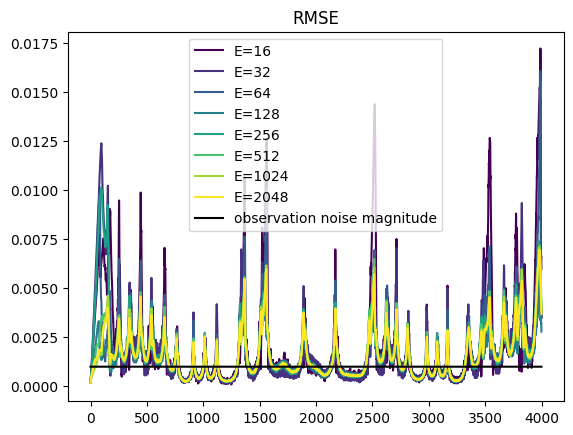

In [85]:
plt.title('RMSE')
list = [rmse_1,rmse_2,rmse_3,rmse_4,rmse_5,rmse_6,rmse_7,rmse_8]
for i in range(0,8):
    plt.plot(list[i], label=f'E={16*2**i}', color=plt.cm.viridis(i / 7))
plt.plot(observation_noise*jnp.ones_like(list[0]),c='k',label=f'observation noise magnitude')
plt.legend()
plt.show()

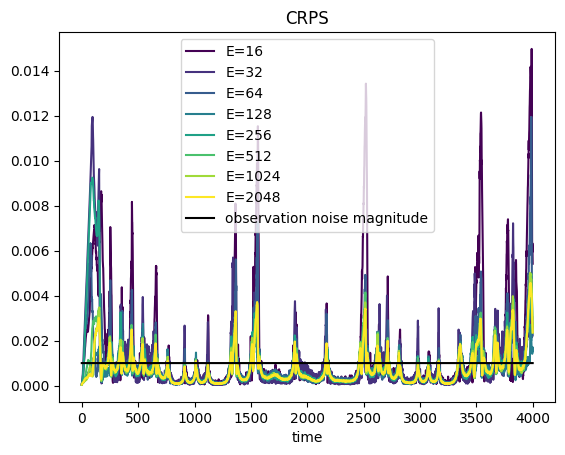

In [86]:
plt.title('CRPS')
list = [crps_1,crps_2,crps_3,crps_4,crps_5,crps_6,crps_7,crps_8]
for i in range(0,8):
    plt.plot(list[i], label=f'E={16*2**i}', color=plt.cm.viridis(i / 7))
plt.plot(observation_noise*jnp.ones_like(list[0]),c='k',label=f'observation noise magnitude')
# plt.plot(rmse_1,label=f'E=16')
# plt.plot(rmse_multinomial,label=f'multinomial-resampling')
# plt.plot(rmse_no_resampling,label=f'no-resampling')
#
plt.xlabel('time')
plt.legend()
plt.show()